In [1]:
!pip install torchvision

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20190314080403-0000
KERNEL_ID = 95fa2bdc-3c5d-4c92-a5b4-c1956ebd6d91
    100% |################################| 71kB 1.6MB/s eta 0:00:01
    100% |################################| 17.2MB 708kB/s eta 0:00:01
    100% |################################| 582.5MB 47kB/s  eta 0:00:01    19% |######                          | 112.8MB 49.3MB/s eta 0:00:10    95% |##############################  | 554.7MB 49.2MB/s eta 0:00:01
    100% |################################| 2.0MB 215kB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
pyspark 2.3.0 requires py4j==0.10.6, which is not installed.


In [2]:
import torch 

In [3]:
print(torch.__version__)

1.0.1.post2


In [4]:
tensor_array=torch.Tensor([[1,2],[4,5]])
tensor_array

tensor([[1., 2.],
        [4., 5.]])

In [5]:
tensor_uninitialized=torch.Tensor(3,3)

In [6]:
torch.numel(tensor_uninitialized)

9

In [7]:
tensor_initialized=torch.rand(2,3)
tensor_initialized

tensor([[0.5763, 0.7253, 0.8157],
        [0.4366, 0.5785, 0.9403]])

In [12]:
tensor_int=torch.randn(5,3).type(torch.IntTensor)

In [8]:
torch.tensor([1.2,3]).dtype

torch.float32

In [14]:
tensor_long=torch.LongTensor([1.0,2.0,3.0])
tensor_long

tensor([1, 2, 3])

In [16]:
tensor_byte=torch.ByteTensor([0,261,1,-5])
tensor_byte

tensor([  0,   5,   1, 251], dtype=torch.uint8)

In [17]:
tensor_ones=torch.ones(10)
tensor_ones

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
tensor_zeroes=torch.zeros(10)
tensor_zeroes

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
tensor_eye=torch.eye(3)
tensor_eye

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [20]:
non_zero=torch.nonzero(tensor_eye)
non_zero

tensor([[0, 0],
        [1, 1],
        [2, 2]])

In [21]:
tensor_ones_shape_eye=torch.ones_like(tensor_eye)
tensor_ones_shape_eye

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [23]:
initial_tensor=torch.rand(3,3)
initial_tensor.fill_(3)

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

In [24]:
new_tensor=initial_tensor.add(4)
new_tensor

tensor([[7., 7., 7.],
        [7., 7., 7.],
        [7., 7., 7.]])

In [25]:
import numpy as np 

In [27]:
numpy_arr=np.array([1,2,3])
numpy_arr

array([1, 2, 3])

In [28]:
tensor=torch.from_numpy(numpy_arr)

In [29]:
tensor

tensor([1, 2, 3])

In [30]:
numpy_from_tensor=tensor.numpy()
numpy_from_tensor

array([1, 2, 3])

In [31]:
numpy_arr[1]=4
numpy_arr

array([1, 4, 3])

In [32]:
tensor

tensor([1, 4, 3])

In [ ]:
tensors and numpy share same memory 

In [33]:
numpy_from_tensor

array([1, 4, 3])

In [34]:
initial_tensor=torch.rand(2,3)
initial_tensor

tensor([[0.7834, 0.1569, 0.2444],
        [0.3895, 0.3012, 0.3274]])

In [36]:
initial_tensor[0,2]

tensor(0.2444)

In [37]:
initial_tensor[:,1:]

tensor([[0.1569, 0.2444],
        [0.3012, 0.3274]])

In [38]:
initial_tensor.size()

torch.Size([2, 3])

In [40]:
initial_tensor.shape

torch.Size([2, 3])

In [42]:
resized_tensor=initial_tensor.view(6)
resized_tensor.shape

torch.Size([6])

In [43]:
resized_tensor

tensor([0.7834, 0.1569, 0.2444, 0.3895, 0.3012, 0.3274])

In [45]:
initial_tensor[0,2]=0.1111
resized_tensor

tensor([0.7834, 0.1569, 0.1111, 0.3895, 0.3012, 0.3274])

In [46]:
resized_tensor=initial_tensor.view(3,2)
resized_tensor.shape

torch.Size([3, 2])

In [47]:
resized_tensor

tensor([[0.7834, 0.1569],
        [0.1111, 0.3895],
        [0.3012, 0.3274]])

In [48]:
resized_matrix=initial_tensor.view(-1,2)
resized_matrix.shape

torch.Size([3, 2])

In [49]:
initial_tensor

tensor([[0.7834, 0.1569, 0.1111],
        [0.3895, 0.3012, 0.3274]])

In [50]:
sorted_tensor,sorted_indices=torch.sort(initial_tensor)

In [51]:
sorted_tensor

tensor([[0.1111, 0.1569, 0.7834],
        [0.3012, 0.3274, 0.3895]])

In [52]:
sorted_indices

tensor([[2, 1, 0],
        [1, 2, 0]])

In [53]:
sorted_tensor,sorted_indices=torch.sort(initial_tensor,dim=0)

In [54]:
sorted_tensor

tensor([[0.3895, 0.1569, 0.1111],
        [0.7834, 0.3012, 0.3274]])

In [55]:
sorted_indices

tensor([[1, 0, 0],
        [0, 1, 1]])

Similar to TF graphs but with one important difference:pytorch computation graphs are dynamic 

In [57]:
from torch.autograd import Variable 

In [59]:
x=Variable(torch.randn(1,10))
h=Variable(torch.randn(1,20))
W_h=Variable(torch.randn(20,20))
W_x=Variable(torch.randn(20,10))

In [61]:
h_prod=torch.mm(W_h,h.t())
x_prod=torch.mm(W_x,x.t())
next_h=(h_prod+x_prod).tanh()

In [65]:
loss=next_h.sum()

In [66]:
loss.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

Building a Simple NN  Model 

loss=0=Ypredice-Yactual

In [67]:
tensor=torch.Tensor([[3,4],[7,5]])

In [68]:
tensor

tensor([[3., 4.],
        [7., 5.]])

In [69]:
tensor.requires_grad

False

In [70]:
tensor.requires_grad_()

tensor([[3., 4.],
        [7., 5.]], requires_grad=True)

In [71]:
tensor.requires_grad

True

In [72]:
print(tensor.grad_fn)

None


In [73]:
out=tensor*tensor

In [74]:
out.requires_grad

True

In [75]:
print(out.grad)

None


In [76]:
print(out.grad_fn)

In [77]:
print(tensor.grad_fn)

None


In [78]:
out=(tensor*tensor.mean())
print(out.grad_fn)
out.backward

In [80]:
print(tensor.grad)#上面那个不起作用

None


In [84]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
x_train =torch.from_numpy(x_train)
y_train=torch.from_numpy(y_train)

print("require grad for x_train",x_train.requires_grad)
print("require grad for x_train",y_train.requires_grad)

In [89]:
input_size=1
hidden_size=100
output_size=1
learning_rate=1e-6

In [90]:
w1=torch.rand(input_size,
              hidden_size,
              requires_grad=True)

In [91]:
w1.shape

torch.Size([1, 100])

In [92]:
w2=torch.rand(input_size,
              hidden_size,
              requires_grad=True)

In [ ]:
for iter in range(1,301):
    y_pred=x_train.mm(w1).clamp(min=0).mm(w2)
    loss=(y_pred-y_train).pow(2).sum()
    
    if iter % 50==0:
        print(iter,loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        w1-=learning_rate*w1.grad
        w2-=learning_rate*w2.grad
        w1.grad.zero_()
        w2.grad.zero_()
    
    

In [ ]:
print("w1":w1)
print("w2":w2)

In [ ]:
x_train_tensor=torch.from_numpy(x_train)
x_train_tensor

In [ ]:
predicted=predicted_in_tensor.detach().numpy()
predicted

In [ ]:
plt.plot(x_train,y_train,"ro",label="Original data")

plt.plot(x_train,predicted,label='Fitted line')

plt.legend()

plt.show()


In [9]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_d068585ca6794db3b83ed62bd18a12d1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Ww3cQB_4dE6bYMEtxvJiEd1mSujEGfdX5z3EEfgQZIjC',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_d068585ca6794db3b83ed62bd18a12d1.get_object(Bucket='pyspark2-donotdelete-pr-u6kv1cpq61thty',Key='names.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

names_data  = pd.read_csv(body)
names_data .head()



,Name,Gender
0,Aamir,Male
1,Aaron,Female
2,Aaron,Male
3,Abagael,Female
4,Abagail,Female


In [10]:
len(names_data)

10132

In [12]:
len(names_data['Name'].unique())

9543

In [14]:
import random 
names_data = names_data.drop_duplicates(subset=['Name'], 
                                        keep=random.choice(['first', 'last']))

In [15]:
names_data.head()

,Name,Gender
0,Aamir,Male
2,Aaron,Male
3,Abagael,Female
4,Abagail,Female
5,Abbe,Female


In [16]:
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
names_data['Gender']=le.fit_transform(names_data['Gender'])
names_data.head()

/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Name,Gender
0,Aamir,1
2,Aaron,1
3,Abagael,0
4,Abagail,0
5,Abbe,0


In [ ]:
#le。fit_transform 记住如何使用这个

In [17]:
genders=['Female','Male']

In [18]:
import string 
all_letters=string.ascii_letters+".,;'"
n_letters=len(all_letters)
all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ.,;'"

In [19]:
# function to convert name in tensors 
#this effectively performs one-hot-encoding 
import torch 
def name_to_tensor(name):
    name_in_tensor=torch.zeros(len(name),1,n_letters)
    for i,letter in enumerate(name):
        name_in_tensor[i][0][all_letters.find(letter)]=1
    return name_in_tensor 

In [20]:
name_to_tensor('jone')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0

In [21]:
#define the RNN 
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)    
        output = self.i2o(combined)    
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [22]:
#create an RNN 
n_hidden = 128
n_genders= len(genders)

rnn = RNN(n_letters, n_hidden, output_size = n_genders)

In [23]:
#define the parameters for training the model 
iterations=100000
criterion=nn.NLLLoss()
learning_rate=0.005

In [24]:
#convert a prediction to the string label for gender 
def output_to_gender (output):
    
    top_n, top_index = output.topk(1)
    pred_i = top_index[0].item()
    pred = genders[pred_i] 
    
    return pred

In [25]:
import random

In [26]:
for iteration in range(1 , iterations +1):

    i = random.randint(0, len(names_data) - 1)
    
    name = names_data.iloc[i][0]
    name_in_tensor = name_to_tensor(name)
    
    gender = names_data.iloc[i][1]
    gender_in_tensor = torch.LongTensor([gender])
    
    hidden = rnn.initHidden()
    rnn.zero_grad()

    for i in range(name_in_tensor.size()[0]):
        output, hidden = rnn(name_in_tensor[i], hidden)

    loss = criterion(output, gender_in_tensor)
    loss.backward()
    
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    if iteration% 5000 == 0:
        
        pred = output_to_gender(output)
        
        correct = '✓' if pred == genders[gender] else '✗ (%s)' % genders[gender]
        print('iters- %d %d%% (%s) Name- %s Gender- %s %s' % \
              (iteration, iteration/iterations*100, loss.item(), name, pred, correct))

iters- 5000 5% (0.8627834320068359) Name- Terri Gender- Female ✗ (Male)
iters- 10000 10% (0.5916165113449097) Name- Perry Gender- Male ✓
iters- 15000 15% (0.4957372844219208) Name- Danyell Gender- Female ✓
iters- 20000 20% (0.11897659301757812) Name- Benoite Gender- Female ✓
iters- 25000 25% (0.005750894546508789) Name- Madelina Gender- Female ✓
iters- 30000 30% (0.03524589538574219) Name- Gusta Gender- Female ✓
iters- 35000 35% (0.21323752403259277) Name- Marie Gender- Female ✓
iters- 40000 40% (0.5342760682106018) Name- Chandal Gender- Female ✓
iters- 45000 45% (0.0014083385467529297) Name- Natalya Gender- Female ✓
iters- 50000 50% (1.1558303833007812) Name- Akiko Gender- Male ✗ (Female)
iters- 55000 55% (1.1959596872329712) Name- Waly Gender- Male ✗ (Female)
iters- 60000 60% (0.24575191736221313) Name- Candance Gender- Female ✓
iters- 65000 65% (0.09537744522094727) Name- Rycca Gender- Female ✓
iters- 70000 70% (0.7235228419303894) Name- Wrennie Gender- Male ✗ (Female)
iters- 75000 

In [27]:
#perform a test using 10000 randomly selected names 
n_confusion = 10000

prediction=[]
actual = []

for _ in range(n_confusion):

    i = random.randint(0, len(names_data) - 1)
    
    name = names_data.iloc[i][0]
    name_in_tensor = name_to_tensor(name)
    
    gender_idx = names_data.iloc[i][1]
    gender_in_tensor = torch.LongTensor([gender_idx])
        
    hidden = rnn.initHidden()

    for j in range(name_in_tensor.size()[0]):
        output, hidden = rnn(name_in_tensor[j], hidden)
    
    pred = output_to_gender(output)
    
    prediction.append(pred)
    actual.append(genders[gender_idx])

In [29]:
!pip install pandas_ml

    100% |################################| 102kB 3.1MB/s ta 0:00:01
    100% |################################| 10.0MB 1.3MB/s eta 0:00:01
    100% |################################| 235kB 3.5MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/e3/18/4f013c3c3051f4e0ffbaa4bf247050d6d5e527fe9cb1907f5975b172f23f/numpy-1.16.2-cp35-cp35m-manylinux1_x86_64.whl
    100% |################################| 512kB 2.9MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl
pyspark 2.3.0 requires py4j==0.10.6, which is not installed.
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
Target directory /home/spark/shared/user-libs/python3/six.py already exists. Specify --upgrade to force replacement.
Target directory /home/spark/shared/user-libs/python3/numpy already exists. Specify --upgrade to force replacement.
Target directory

In [30]:
from pandas_ml import ConfusionMatrix
import numpy as np 

In [31]:
np_prediction = np.array(prediction)
np_actual = np.array(actual)

In [32]:
cm = ConfusionMatrix(np.where(np_prediction == 'Female', True, False), 
                     np.where(np_actual == 'Female', True, False))
cm

Predicted  False  True  __all__
Actual                         
False       2416   897     3313
True         870  5817     6687
__all__     3286  6714    10000

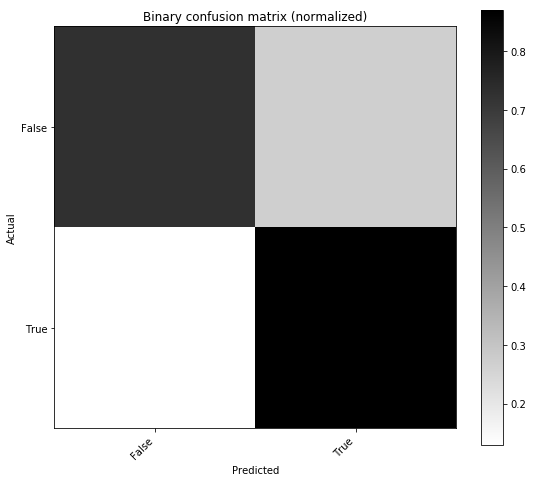

In [33]:
import matplotlib.pyplot as plt
cm.plot(normalized=True)
plt.show()